In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/modul9/tmdb_movies.csv
/kaggle/input/modul9/tmdb_genres.csv


In [2]:
genres = pd.read_csv("/kaggle/input/modul9/tmdb_genres.csv", names=['genre_id', 'genres'], header = None)
movies = pd.read_csv("/kaggle/input/modul9/tmdb_movies.csv", index_col=[0])
#genres.head()
#movies.head()


In [3]:
#Lista 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

q3 = movies.vote_count.quantile(0.75)
movies.loc[(movies.vote_count >q3), ['vote_average', 'vote_count']].nlargest(10, 'vote_average')

,vote_average,vote_count
1881,8.5,8205
3337,8.4,5893
662,8.3,9413
1818,8.3,4329
2294,8.3,3840
2731,8.3,3338
3232,8.3,8428
3865,8.3,4254
65,8.2,12002
690,8.2,4048


In [4]:
#Obliczenie przychodow i budzetu w latach 2010 -2016
movies.release_date = pd.to_datetime(movies.release_date, format='%Y-%m-%d')
filtered = movies.loc[(movies.release_date>='2010-01-01') & (movies.release_date<='2016-12-31'), ['budget', 'revenue', 'release_date']]
grouped = filtered.groupby(filtered.release_date.dt.year)['budget', 'revenue'].sum()
grouped

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,budget,revenue
release_date,,
2010,7761467461,20348574768
2011,7754227435,20516921160
2012,7263782654,24141710246
2013,8205880834,23411493295
2014,7368453311,24120490589
2015,6724547367,22775024221
2016,4753140000,14461156948


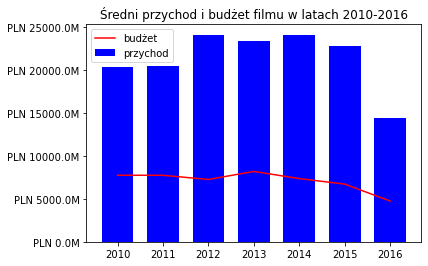

In [5]:
#Wykres dla uzyskanych przychodow i budzetu w latach 2010-2016
fig, ax = plt.subplots()
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = grouped.budget
y2 = grouped.revenue
ax.plot(years, y1, color='red', label='budżet')
ax.bar(years, y2, color='blue', width=0.7, label='przychod')
def million(x, pos):
    return 'PLN {:2.1f}M'.format(x*1e-6)
formatter = plt.FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)
ax.set_title('Średni przychod i budżet filmu w latach 2010-2016')
ax.legend(loc=0)

In [6]:
#Połączenie dwoch baz danych: movies i genres
merged = pd.merge(movies, genres, 
                  how="left", on = "genre_id")
#merged.head()


In [7]:
merged['genres'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
genres               28
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

In [8]:
#Sortowanie gatunkow filmow wzgledem ich sredniego czasu trwania
merged.groupby(['genres'])['runtime'].mean().sort_values(ascending=False)

genres
History            133.960000
War                126.125000
Western            117.925926
Drama              115.521559
Adventure          113.061947
Crime              112.143590
TV Movie           110.500000
Action             109.058355
Science Fiction    109.031250
Romance            107.094340
Fantasy            106.487179
Thriller           105.690722
Music              102.852941
Mystery            100.609756
Comedy             100.464491
Horror              94.753333
Documentary         93.511364
Family              89.803571
Animation           89.552846
Foreign             83.000000
genres              50.392857
Name: runtime, dtype: float64

(array([2., 3., 5., 8., 4., 0., 0., 2., 0., 1.]),
 array([ 84. ,  98.1, 112.2, 126.3, 140.4, 154.5, 168.6, 182.7, 196.8,
        210.9, 225. ]),
 <BarContainer object of 10 artists>)

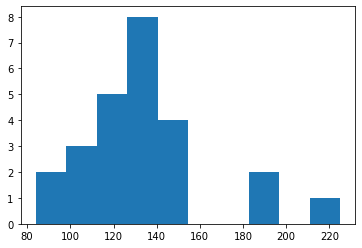

In [9]:
#Histogram dla gatunku filmow, ktore srednio trwaja najdluzej
genre_history=merged[merged.genres=="History"]
plt.hist(genre_history.runtime)